In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/HorseDetails.csv")


In [ ]:
data

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,num_lesions
0,2.0,1.0,38.5,66.0,28.0,3.0,3.0,NaN,2.0,5.0,...,4.0,NaN,NaN,3.0,5.0,45.0,8.400000,2.0,2.0,1.0
1,1.0,1.0,39.2,88.0,20.0,NaN,NaN,4.0,1.0,3.0,...,2.0,NaN,NaN,4.0,2.0,50.0,85.000000,3.0,2.0,1.0
2,2.0,1.0,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,...,1.0,NaN,NaN,1.0,1.0,33.0,6.700000,1.0,2.0,0.0
3,1.0,2.0,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,...,4.0,1.0,3.0,3.0,NaN,48.0,7.200000,2.0,1.0,1.0
4,2.0,1.0,37.3,104.0,35.0,NaN,NaN,6.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,74.0,7.400000,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1.0,NaN,120.0,70.0,4.0,NaN,4.0,2.0,2.0,...,NaN,NaN,NaN,NaN,5.0,55.0,65.000000,3.0,2.0,1.0
295,2.0,1.0,37.2,72.0,24.0,3.0,2.0,4.0,2.0,4.0,...,3.0,3.0,1.0,4.0,4.0,44.0,24.274436,3.0,1.0,1.0
296,1.0,1.0,37.5,72.0,30.0,4.0,3.0,4.0,1.0,4.0,...,3.0,2.0,1.0,3.0,5.0,60.0,6.800000,2.0,1.0,1.0
297,1.0,1.0,36.5,100.0,24.0,3.0,3.0,3.0,1.0,3.0,...,3.0,3.0,1.0,4.0,4.0,50.0,6.000000,1.0,1.0,1.0


In [ ]:
data.dtypes

surgery                  float64
age                      float64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities      float64
peripheral_pulse         float64
mucous_membrane          float64
capillary_refill_time    float64
pain                     float64
peristalsis              float64
abdominal_distention     float64
nasogastric_tube         float64
nasogastric_reflux       float64
rectal_exam_feces        float64
abdomen                  float64
packed_cell_volume       float64
total_protein            float64
outcome                  float64
surgical_lesion          float64
num_lesions              float64
dtype: object

In [ ]:
data.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [ ]:
data.isnull().sum()

surgery                    0
age                        0
rectal_temp               60
pulse                      0
respiratory_rate           0
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
rectal_exam_feces        102
abdomen                  118
packed_cell_volume         0
total_protein              0
outcome                    0
surgical_lesion            0
num_lesions                0
dtype: int64

In [ ]:
data. drop(["hospital_number","nasogastric_reflux_ph","abdomo_protein","abdomo_appearance","cp_data"], axis=1, inplace=True)

In [ ]:
data.loc[data['lesion_1'] > 0, 'lesion_1'] = 1
data.loc[data['lesion_2'] > 0, 'lesion_2'] = 1
data.loc[data['lesion_3'] > 0, 'lesion_3'] = 1

data['num_lesions'] = (data['lesion_1'] + data['lesion_2'] + data['lesion_3']).astype('float64')
data.drop(columns = ['lesion_1','lesion_2', 'lesion_3'], axis = 1, inplace=True)

In [ ]:
data['surgery'] = data['surgery'].map({'yes':1, 'no':2}).astype('float64')
data['age'] = data['age'].map({'adult':1, 'young':2}).astype('float64')
data['temp_of_extremities'] = data['temp_of_extremities'].map({'normal':1, 'warm':2, 'cool':3, 'cold':4}).astype('float64')
data['peripheral_pulse'] = data['peripheral_pulse'].map({'normal':1, 'increased':2, 'reduced':3, 'absent':4}).astype('float64')
data['mucous_membrane'] = data['mucous_membrane'].map({'normal_pink':1, 'bright_pink':2, 'pale_pink':3, 'pale_cyanotic':4, 'bright_red':5, 'dark_cyanotic':6}).astype('float64')
data['capillary_refill_time'] = data['capillary_refill_time'].map({'less_3_sec':1, '3':2, 'more_3_sec':2}).astype('float64')
data['pain'] = data['pain'].map({'alert':1, 'depressed':2, 'mild_pain':3, 'severe_pain':4,  'extreme_pain':5}).astype('float64')
data['peristalsis'] = data['peristalsis'].map({'hypermotile':1, 'normal':2, 'hypomotile':3, 'absent':4}).astype('float64')
data['abdominal_distention'] = data['abdominal_distention'].map({'none':1, 'slight':2, 'moderate':3, 'severe':4}).astype('float64')
data['nasogastric_tube'] = data['nasogastric_tube'].map({'none':1, 'slight':2, 'significant':3}).astype('float64')
data['nasogastric_reflux'] = data['nasogastric_reflux'].map({'none':1, 'more_1_liter':2, 'less_1_liter':3}).astype('float64')
data['rectal_exam_feces'] = data['rectal_exam_feces'].map({'normal':1, 'increased':2, 'decreased':3, 'absent':4}).astype('float64')
data['abdomen'] = data['abdomen'].map({'normal':1, 'other':2, 'firm':3, 'distend_small':4, 'distend_large':5}).astype('float64')
data['surgical_lesion'] = data['surgical_lesion'].map({'yes':1, 'no':2}).astype('float64')
data['outcome'] = data['outcome'].map({'lived':1, 'died':2, 'euthanized':3}).astype('float64')

In [ ]:
data['total_protein'].fillna(value = data['total_protein'].mean(), inplace=True)
data['packed_cell_volume'].fillna(value = data['packed_cell_volume'].mean(), inplace=True)
data['pulse'].fillna(value = data['pulse'].mean(), inplace=True)
data['respiratory_rate'].fillna(value = data['respiratory_rate'].mean(), inplace=True)
data['rectal_temp'].fillna(value = data['rectal_temp'].mean(), inplace=True)

In [ ]:
data['peripheral_pulse'].value_counts(dropna=False)

1.0    114
3.0    103
NaN     69
4.0      8
2.0      5
Name: peripheral_pulse, dtype: int64

In [ ]:
nr_dis = data.groupby(by='nasogastric_reflux').size()
nr_dis.plot()

In [ ]:
data.describe()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,num_lesions
count,299.000000,299.000000,239.000000,275.000000,241.000000,243.000000,230.000000,252.000000,267.000000,244.000000,...,243.000000,195.000000,193.000000,197.000000,181.000000,270.000000,266.000000,299.000000,299.000000,299.000000
mean,1.397993,1.080268,38.168619,72.000000,30.460581,2.345679,2.021739,2.853175,1.299625,2.946721,...,2.271605,1.753846,1.564767,2.756345,3.685083,46.307407,24.274436,1.551839,1.364548,0.839465
std,0.490305,0.272162,0.733744,28.646219,17.666102,1.046369,1.042527,1.623492,0.458954,1.308892,...,1.064207,0.650870,0.782093,1.254186,1.492667,10.436743,27.364194,0.737187,0.482110,0.442288
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,3.300000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,37.800000,48.000000,18.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,38.000000,6.500000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,25.000000,3.000000,2.000000,3.000000,1.000000,3.000000,...,2.000000,2.000000,1.000000,3.000000,4.000000,45.000000,7.500000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,3.000000,4.000000,2.000000,4.000000,...,3.000000,2.000000,2.000000,4.000000,5.000000,52.000000,56.750000,2.000000,2.000000,1.000000
max,2.000000,2.000000,40.800000,184.000000,96.000000,4.000000,4.000000,6.000000,2.000000,5.000000,...,4.000000,3.000000,3.000000,4.000000,5.000000,75.000000,89.000000,3.000000,2.000000,3.000000


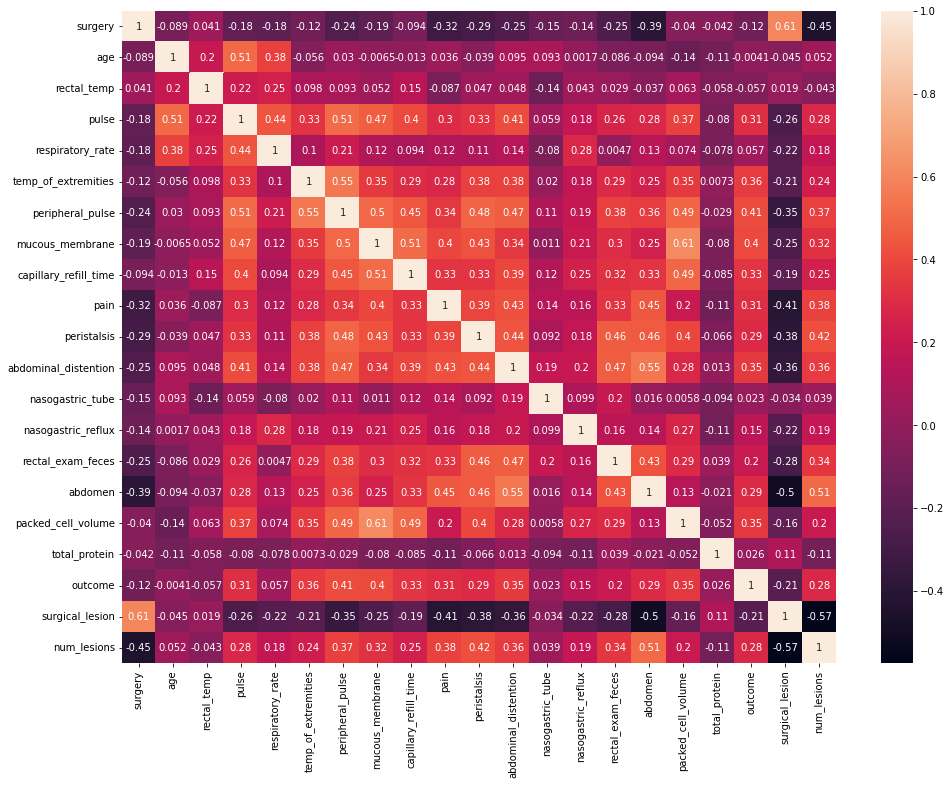

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
correl = data.corr()
sb.heatmap(correl,xticklabels=correl.columns, yticklabels=correl.columns, annot=True, ax = ax)

df[colName].replace(colArray, replaceArray,  inplace = True)
To plot a heatmap
fig, ax = plt.subplots(figsize=(14,10))
correl = data.corr()
sb.heatmap(correl,xticklabels=correl.columns, yticklabels=correl.columns, annot=True, ax = ax)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

data4Pulse = pd.DataFrame(data.iloc[:, [2,3]].values)
data4Pulse.dropna(inplace = True)
inputData4Pulse = pd.DataFrame(data4Pulse.iloc[:, [0]].values)

outputData4Pulse = pd.DataFrame(data4Pulse.iloc[:, [1]].values)
inputData4Pulse_train, inputData4Pulse_test, outputData4Pulse_train, outputData4Pulse_test = train_test_split(inputData4Pulse, outputData4Pulse, test_size = 0.40, random_state = 0)

sc_inputData4Pulse = StandardScaler()
inputData4Pulse_train = sc_inputData4Pulse.fit_transform(inputData4Pulse_train) 
inputData4Pulse_test = sc_inputData4Pulse.transform(inputData4Pulse_test)

classifier = LogisticRegression(random_state = 0)
classifier.fit(inputData4Pulse_train, outputData4Pulse_train)

outputData4Pulse_test = classifier.predict(inputData4Pulse_test)
cm = confusion_matrix(outputData4Pulse_test, outputData4Pulse_test)
print ("Confusion Matrix : \n", cm)
#print ("Accuracy : ", accuracy_score(outputData4Pulse_test.reshape(1,outputData4Pulse_test.count()), outputData4Pulse_test.reshape(1,outputData4Pulse_test.count())))

Confusion Matrix : 
 [[15  0  0  0  0]
 [ 0 37  0  0  0]
 [ 0  0 30  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0  3]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


To perform SMOTE analysis for imperfect or unbalanced data. Also try Ridge Regression.